# Gradient Descent Optimization Algorithms

* [An overview of gradient descent optimization algorithms](http://sebastianruder.com/optimizing-gradient-descent/index.html#adadelta)
* [CS231 Gradient Descent](http://cs231n.github.io/optimization-1/)
* [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/neural-networks-3/)
* [Optimization: Stochastic Gradient Descent](http://ufldl.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/)

### 다음과 같이 표기

* **Weights (parameters):** $ \theta $ 이며.. 이때 $ \theta \in R^d $  이다. 
* **Objective Function:** $ J(w) $ 
* **Gradient of the objective function:** $ \nabla_\theta J(\theta) $


### Import Libraries

In [2]:
%pylab inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


### Data

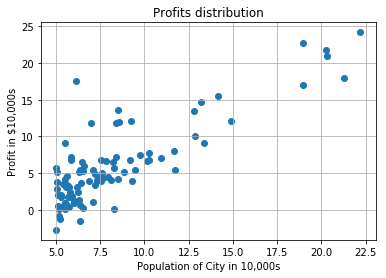

In [25]:
data = np.loadtxt('./data/ex1data1.txt', delimiter=',')
X = data[:, 0].reshape(data[:, 0].shape[0], 1) # Population
Y = data[:, 1].reshape(data[:, 1].shape[0], 1) # profit

# Standardization
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()
# X = scaler_x.fit_transform(X)
# Y = scaler_y.fit_transform(Y)

scatter(X, Y)
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
grid()

# Batch Gradient Descent (Vanilla Gradient Descent)

Gradient Descent를 할때 **전체 training dataset**을 사용해서 구합니다.<br>
<small style="color:#888888"> $ \nabla $ 는 derivativation을 가르키고, $ \Delta $ 는 차이점을 가르킴 </small>

$ \theta = \theta - \eta \cdot \nabla_\theta J( \theta) $

즉 weights(parameters) 한번을 업데이트 하기 위해서 **전체 dataset**을 다 돌려야 하기 때문에 매우 느리며, 메모리에 다 들어가지도 않는 경우가 많습니다. 또한 실시간으로 새로운 데이터가 입력되는 (on-the-fly)상황에서도 전체 데이터를 다 돌려야 하기때문에 적용을 할 수 없습니다.



아래는 참고로.. derivative of $ J(\theta) $ 했을때..

$$ \frac{\partial}{\partial \theta} = \Delta \theta =  \frac{2}{N} \sum^N_{i=1} -x_i(y_i - \sum_{j=0}(\theta_j x_j )) $$


$$ \frac{\partial}{\partial b} = \Delta b = \frac{2}{N} \sum^N_{i=1} -(y_i - \sum_{j=0}(\theta_j x_j)) $$



In [ ]:
w = np.array([-0.1941133,  -2.07505268]) # np.random.randn(2)

def predict(w, X):
    N = len(X)
    yhat = w[1:].dot(X.T) + w[0]
    yhat = yhat.reshape(X.shape)
    return yhat

def batch_gradient_descent(X, Y, w, eta=0.1):
    N = len(X)
    yhat = predict(w, X)
    delta = Y - yhat
    w_delta = 2/N * np.sum(-delta.T.dot(X))
    b_delta = 2/N * np.sum(-delta)
    
    w[1:] = w[1:] - eta * w_delta
    w[0] = w[0] - eta * b_delta
    return w

for i in range(1, 10):
    
    w = batch_gradient_descent(X, Y, w)
    yhat = predict(w, X)
    
    axes = subplot(3, 3, i)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    scatter(X, Y)
    plot(X, yhat, color='red')
    grid()
    axes.grid()
    
    yhats = np.where(yhat >= 0.5, 1, 0)
    accuracy = mean_squared_error(Y, yhats)
    print('Mean Squared Error (less is good):', accuracy)

# Stochastic Gradient Descent

SGD의 경우는 완전 반대로 weights(parameters) 업데이트를 각각의 traning data $ x^{(i)} $ 그리고 label $ y^{(i)} $마다 합니다.

$ \theta = \theta - \eta \cdot \nabla_\theta J( \theta; x^{(i)}; y^{(i)}) $

Mean Squared Error (less is good): 53.46719765181855
Mean Squared Error (less is good): 53.46719765181855
Mean Squared Error (less is good): 53.46719765181855
Mean Squared Error (less is good): 53.46719765181855
Mean Squared Error (less is good): 53.46719765181855
Mean Squared Error (less is good): 53.46719765181855
Mean Squared Error (less is good): 53.46719765181855
Mean Squared Error (less is good): 53.46719765181855
Mean Squared Error (less is good): 53.46719765181855


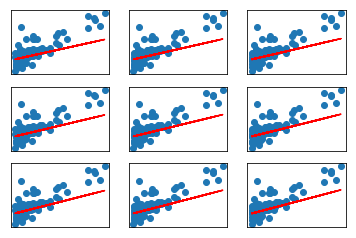

In [27]:
w = np.array([-0.1941133,  -2.07505268])

def sgd(X, Y, w, eta=0.1):
    N = len(X)
    for i in range(N):
        x = X[i]
        y = Y[i]
        yhat = predict(w, x)
        delta = y - yhat

        w_delta = 2/N * np.sum(-delta.T.dot(x))
        b_delta = 2/N * np.sum(-delta)
        
        w[1:] = w[1:] - eta * w_delta
        w[0] = w[0] - eta * b_delta
    return w
    


for i in range(1, 10):
    w = sgd(X, Y, w)
    yhat = predict(w, X)
    
    axes = subplot(3, 3, i)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    scatter(X, Y)
    plot(X, yhat, color='red')
    grid()
    axes.grid()
    
    yhats = np.where(yhat >= 0.5, 1, 0)
    accuracy = mean_squared_error(Y, yhats)
    print('Mean Squared Error (less is good):', accuracy)